In [92]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Import data

In [93]:
#13k top spotify songs 
df=pd.read_csv('data/df.csv', sep=",")
#users favorite tracks based on time 
df_fav=pd.read_csv('data/df_fav.csv', sep=",")

In [94]:
# Create new column with minutes listened to
df['minutes'] = df['length'] / 60000
df_fav['minutes'] = df_fav['length'] / 60000

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12476 entries, 0 to 12475
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          12476 non-null  object 
 1   Song              12476 non-null  object 
 2   Artists           12476 non-null  object 
 3   Album             12476 non-null  object 
 4   length            12476 non-null  int64  
 5   time_signature    12476 non-null  int64  
 6   danceability      12476 non-null  float64
 7   acousticness      12476 non-null  float64
 8   energy            12476 non-null  float64
 9   tempo             12476 non-null  float64
 10  instrumentalness  12476 non-null  float64
 11  loudness          12476 non-null  float64
 12  liveness          12476 non-null  float64
 13  key               12476 non-null  float64
 14  valence           12476 non-null  float64
 15  speechiness       12476 non-null  float64
 16  mode              12476 non-null  int64 

In [96]:
df = pd.concat([df, df_fav])

In [97]:
df

,track_id,Song,Artists,Album,length,time_signature,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,key,valence,speechiness,mode,Popularity,favorite,minutes
0,3rUGC1vUpkDG9CZFHMur1t,greedy,['Tate McRae'],greedy,131872,1,0.750,0.2560,0.733,111.018000,0.000000,-3.180,0.1140,6.000,0.844,0.0319,0,98.000,0,2.197867
1,7aqfrAY2p9BUSiupwk3svU,First Person Shooter (feat. J. Cole),"['Drake', 'J. Cole']",For All The Dogs,247444,4,0.470,0.0277,0.640,163.920000,0.000000,-7.779,0.3820,2.000,0.248,0.3200,1,91.000,0,4.124067
2,7dJYggqjKo71KI9sLzqCs8,Agora Hills,['Doja Cat'],Scarlet,265360,4,0.750,0.2280,0.674,123.026000,0.000089,-6.128,0.1220,8.000,0.392,0.0970,0,89.000,0,4.422667
3,4MjDJD8cW7iVeWInc2Bdyj,MONACO,['Bad Bunny'],nadie sabe lo que va a pasar mañana,267194,4,0.787,0.1500,0.621,139.056000,0.000402,-5.009,0.5800,4.000,0.130,0.0680,0,94.000,0,4.453233
4,5aIVCx5tnk0ntmdiinnYvw,Water,['Tyla'],Water,200256,4,0.673,0.0856,0.722,117.187000,0.000000,-3.495,0.1370,3.000,0.519,0.0755,0,92.000,0,3.337600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,5R2rsbwCDXORX2tLfprRmM,Yacht Club (feat. Juice WRLD),Lil Yachty,Nuthin' 2 Prove,166343,72,0.721,0.3170,0.508,0.000000,0.153000,-7.496,0.3940,159.911,4.000,1.0000,7,0.457,1,2.772383
114,6DZz58CbF0AKw5PCKqNKcM,Come to Life,Kanye West,Donda,310393,0,0.440,0.6890,0.465,0.000001,0.384000,-6.592,0.0318,126.937,4.000,1.0000,3,0.241,1,5.173217
115,3CA9pLiwRIGtUBiMjbZmRw,Nice For What,Drake,Scorpion,210746,82,0.585,0.0891,0.909,0.000097,0.119000,-6.474,0.0707,93.372,4.000,1.0000,8,0.758,1,3.512433
116,27GmP9AWRs744SzKcpJsTZ,Jumpman,Drake,What A Time To Be Alive,205879,74,0.852,0.0559,0.553,0.000000,0.332000,-7.286,0.1870,142.079,4.000,1.0000,1,0.656,1,3.431317


In [98]:
# Dropping columns that could lead to data leakage
df_num= df.drop(columns=['track_id','Song', 'Album', 'Artists' ])

In [99]:
df_cat = df[['track_id', 'Song', 'Album', 'Artists']]

## Hot encoding 

In [100]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [101]:
df_hot = df 

In [102]:
# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

# Reshape the 'artists' column
artists_column = df_hot['Artists'].values.reshape(-1, 1)

# Fit and transform the one-hot encoding on the 'artists' column
one_hot_encoded_artists = one_hot_encoder.fit_transform(artists_column)

df_hot['artists'] = np.argmax(one_hot_encoded_artists, axis=1)


In [103]:
# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

# Reshape the 'artists' column
artists_column = df_hot['Album'].values.reshape(-1, 1)

# Fit and transform the one-hot encoding on the 'artists' column
one_hot_encoded_artists = one_hot_encoder.fit_transform(artists_column)

df_hot['album'] = np.argmax(one_hot_encoded_artists, axis=1)


In [104]:
# Assuming df_hot is the DataFrame you're working with
desired_column_order = ['length', 'artists', 'album', 'time_signature', 'danceability', 'acousticness', 'energy', 'tempo', 'instrumentalness', 'loudness', 'liveness', 'key', 'valence', 'speechiness', 'mode', 'Popularity', 'minutes', 'favorite']

# Reorder columns in the DataFrame
df_hot = df_hot[desired_column_order]


In [105]:

df= df.drop(columns=['artists',	'album' ])

In [106]:
df_hot

,length,artists,album,time_signature,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,key,valence,speechiness,mode,Popularity,minutes,favorite
0,131872,7016,9646,1,0.750,0.2560,0.733,111.018000,0.000000,-3.180,0.1140,6.000,0.844,0.0319,0,98.000,2.197867,0
1,247444,2075,2891,4,0.470,0.0277,0.640,163.920000,0.000000,-7.779,0.3820,2.000,0.248,0.3200,1,91.000,4.124067,0
2,265360,2007,7025,4,0.750,0.2280,0.674,123.026000,0.000089,-6.128,0.1220,8.000,0.392,0.0970,0,89.000,4.422667,0
3,267194,742,9691,4,0.787,0.1500,0.621,139.056000,0.000402,-5.009,0.5800,4.000,0.130,0.0680,0,94.000,4.453233,0
4,200256,7579,9135,4,0.673,0.0856,0.722,117.187000,0.000000,-3.495,0.1370,3.000,0.519,0.0755,0,92.000,3.337600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,166343,15,5774,72,0.721,0.3170,0.508,0.000000,0.153000,-7.496,0.3940,159.911,4.000,1.0000,7,0.457,2.772383,1
114,310393,12,2325,0,0.440,0.6890,0.465,0.000001,0.384000,-6.592,0.0318,126.937,4.000,1.0000,3,0.241,5.173217,1
115,210746,6,7135,82,0.585,0.0891,0.909,0.000097,0.119000,-6.474,0.0707,93.372,4.000,1.0000,8,0.758,3.512433,1
116,205879,6,9212,74,0.852,0.0559,0.553,0.000000,0.332000,-7.286,0.1870,142.079,4.000,1.0000,1,0.656,3.431317,1


In [107]:
corr = df_hot.corr()
corr.style.background_gradient(cmap='coolwarm')

,length,artists,album,time_signature,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,key,valence,speechiness,mode,Popularity,minutes,favorite
length,1.000000,-0.008983,-0.001882,-0.032079,-0.291032,0.245579,-0.266986,-0.100453,0.267301,-0.288331,-0.046754,-0.033598,-0.174053,-0.108125,0.000806,-0.194682,1.000000,-0.030234
artists,-0.008983,1.000000,0.058259,-0.163912,-0.027774,-0.024876,0.040306,0.083361,-0.025271,0.039659,0.025086,-0.157273,-0.113484,-0.080025,-0.082651,0.053177,-0.008983,-0.168110
album,-0.001882,0.058259,1.000000,0.007713,-0.028183,0.047164,-0.044674,-0.006696,0.012330,-0.037943,0.005318,0.008115,-0.006469,-0.013033,0.010263,-0.022219,-0.001882,0.007050
time_signature,-0.032079,-0.163912,0.007713,1.000000,0.098211,-0.053774,0.011488,-0.354969,-0.002060,0.042965,-0.008512,0.913523,0.781417,0.405236,0.512862,-0.227601,-0.032079,0.971982
danceability,-0.291032,-0.027774,-0.028183,0.098211,1.000000,-0.479613,0.421915,0.038705,-0.288730,0.497853,-0.020742,0.083453,0.377975,0.232150,-0.039652,0.274074,-0.291032,0.083934
acousticness,0.245579,-0.024876,0.047164,-0.053774,-0.479613,1.000000,-0.845074,-0.257731,0.366818,-0.777826,-0.137243,-0.049008,-0.242759,-0.111478,0.055468,-0.318250,0.245579,-0.037923
energy,-0.266986,0.040306,-0.044674,0.011488,0.421915,-0.845074,1.000000,0.306143,-0.351459,0.851628,0.201977,0.008998,0.247958,0.099899,-0.067574,0.301593,-0.266986,-0.003962
tempo,-0.100453,0.083361,-0.006696,-0.354969,0.038705,-0.257731,0.306143,1.000000,-0.121086,0.265663,0.066720,-0.348380,-0.212988,-0.101379,-0.198533,0.203514,-0.100453,-0.371333
instrumentalness,0.267301,-0.025271,0.012330,-0.002060,-0.288730,0.366818,-0.351459,-0.121086,1.000000,-0.533006,-0.099570,0.004563,-0.201461,-0.131155,-0.007469,-0.287697,0.267301,0.005347
loudness,-0.288331,0.039659,-0.037943,0.042965,0.497853,-0.777826,0.851628,0.265663,-0.533006,1.000000,0.155501,0.032722,0.261172,0.121559,-0.037746,0.356414,-0.288331,0.027500


In [108]:
df_hot.head()

,length,artists,album,time_signature,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,key,valence,speechiness,mode,Popularity,minutes,favorite
0,131872,7016,9646,1,0.750,0.2560,0.733,111.018,0.000000,-3.180,0.114,6.0,0.844,0.0319,0,98.0,2.197867,0
1,247444,2075,2891,4,0.470,0.0277,0.640,163.920,0.000000,-7.779,0.382,2.0,0.248,0.3200,1,91.0,4.124067,0
2,265360,2007,7025,4,0.750,0.2280,0.674,123.026,0.000089,-6.128,0.122,8.0,0.392,0.0970,0,89.0,4.422667,0
3,267194,742,9691,4,0.787,0.1500,0.621,139.056,0.000402,-5.009,0.580,4.0,0.130,0.0680,0,94.0,4.453233,0
4,200256,7579,9135,4,0.673,0.0856,0.722,117.187,0.000000,-3.495,0.137,3.0,0.519,0.0755,0,92.0,3.337600,0


In [118]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Assuming X contains your feature data and y contains the target variable
# X should be a pandas DataFrame or a NumPy array
# y should be a pandas Series or a NumPy array

X = df_hot.drop('favorite', axis=1)  # X contains all columns except the 'favorite' column
y = df_hot['favorite'] 

# Initialize the Random Forest Classifier
rf = RandomForestClassifier()

# Fit the model with your data
rf.fit(X, y)

# Retrieve feature importance
feature_importances = rf.feature_importances_

# Create a DataFrame to better visualize feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Set a threshold for feature importance
threshold = 0.03  # Adjust this value according to your requirements

# Select features based on the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature']

# Use selected features for your classification model
X_selected = X[selected_features]


In [119]:
X_selected

,key,artists,time_signature,valence,mode,tempo,speechiness
0,6.000,7016,1,0.844,0,111.018000,0.0319
1,2.000,2075,4,0.248,1,163.920000,0.3200
2,8.000,2007,4,0.392,0,123.026000,0.0970
3,4.000,742,4,0.130,0,139.056000,0.0680
4,3.000,7579,4,0.519,0,117.187000,0.0755
...,...,...,...,...,...,...,...
113,159.911,15,72,4.000,7,0.000000,1.0000
114,126.937,12,0,4.000,3,0.000001,1.0000
115,93.372,6,82,4.000,8,0.000097,1.0000
116,142.079,6,74,4.000,1,0.000000,1.0000


In [122]:
pip install graphviz

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\ethan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


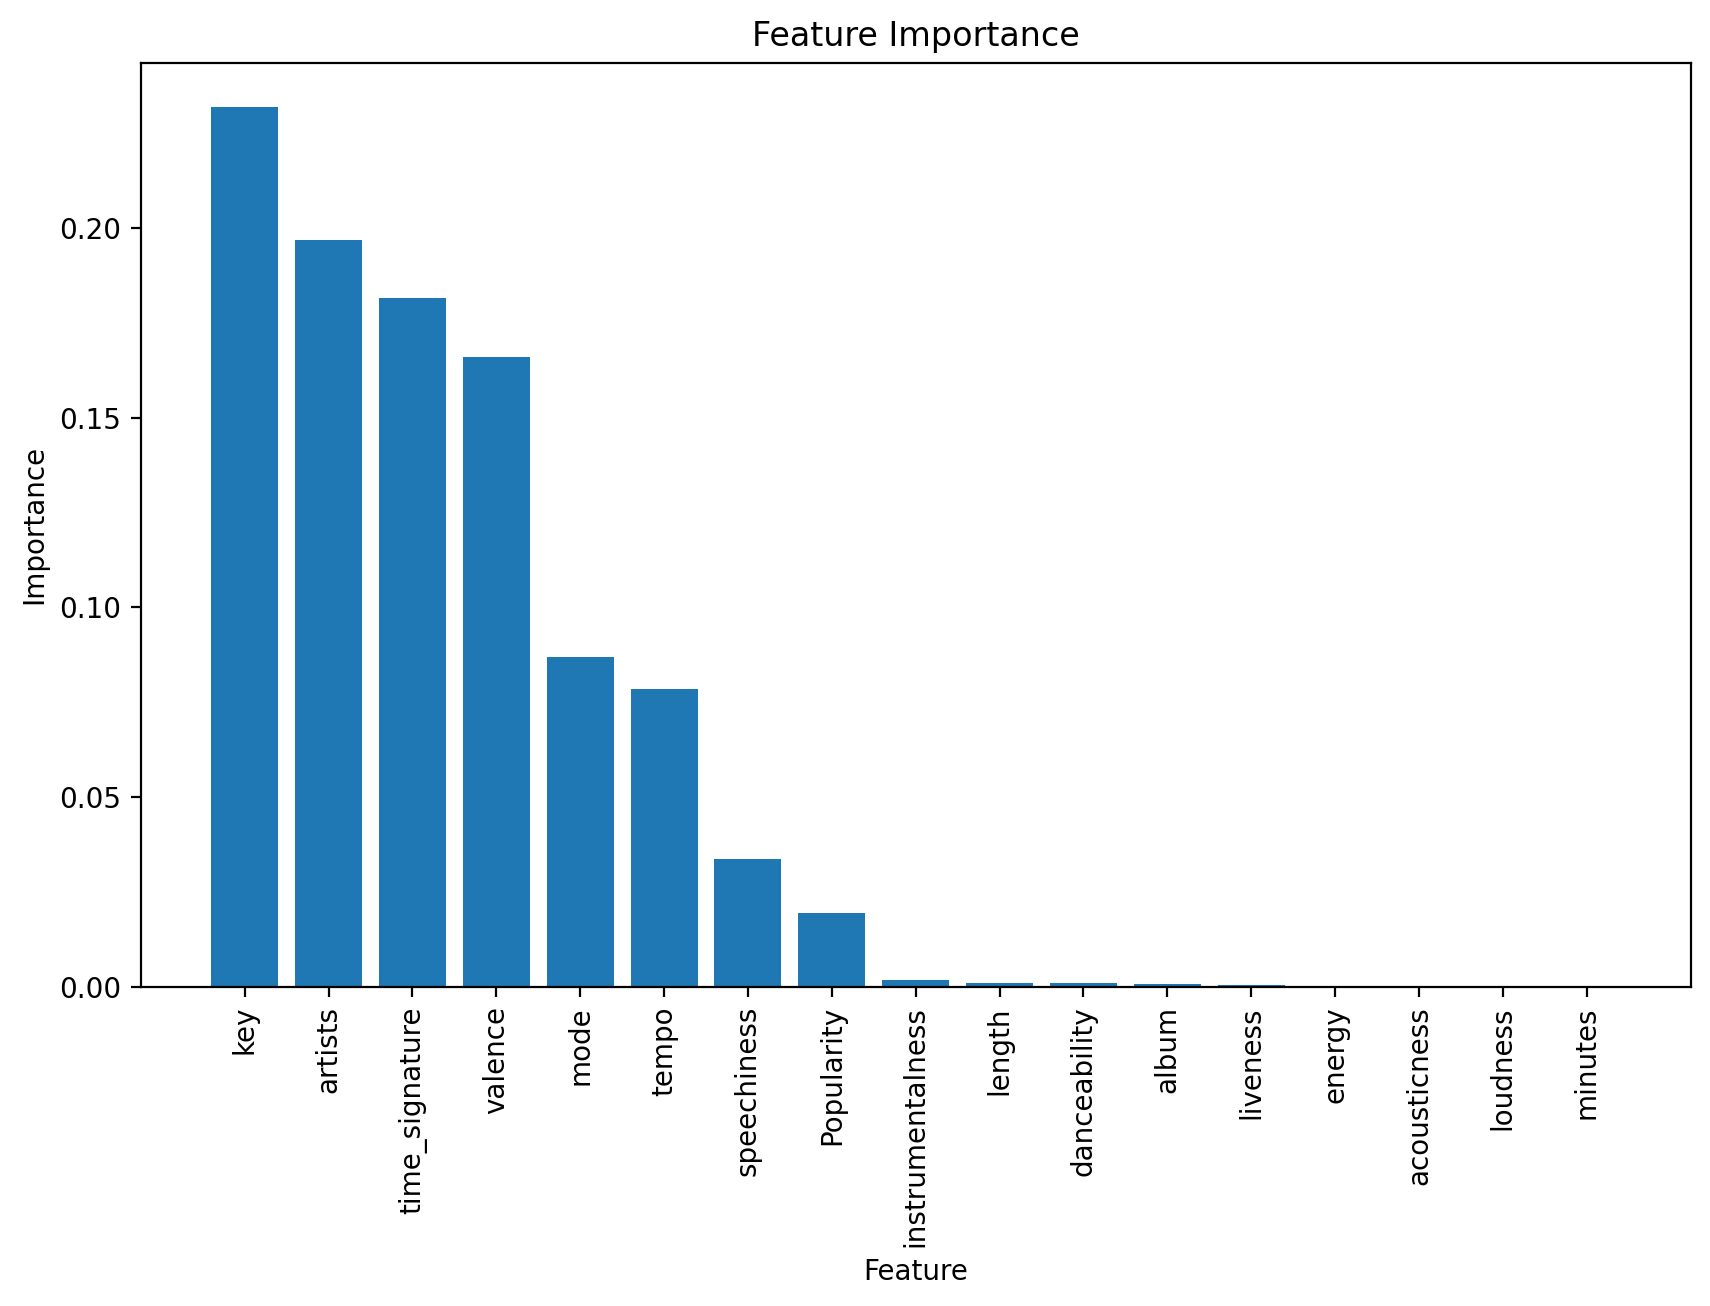

In [124]:
import matplotlib.pyplot as plt

# Assuming 'rf' is your trained Random Forest model
feature_importance = rf.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.xticks(range(len(feature_importance)), X.columns[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()
